# Principal Component Analysis (PCA)

The function **pca** computes the principal components transformation matriz of a given data set.
The input is the data set organized as one row per sample e columns with attributes of each sample.
The output are three: the eigenvector matriz, the diagonal of the covariance matriz and the sample mean.

## Function definition

In [11]:
import numpy as np

def pca(X):
    '''
    features are in the columns
    samples are in the rows
    '''
    n, dim = X.shape
    mu = X.mean(axis=0)
    Xc = X - mu                    # 0 mean

    C = (Xc.T).dot(Xc)/(n-1)        # Covariance matrix
    e,V = np.linalg.eigh(C)       # eigenvalues and eigenvectors of the covariance matrix        
    indexes = np.argsort(e)[::-1] # sorting eigenvalues from largest  
    e  = e [indexes]              # update e and V
    V = V[:,indexes]
    return V,e,mu       

## Example -  Bidimensional Gaussian distribution

In [1]:
testing = (__name__ == "__main__")

if testing:
    ! jupyter nbconvert --to python pca.ipynb
    import numpy as np
    import sys,os
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook pca.ipynb to python
[NbConvertApp] Writing 5868 bytes to pca.py


### Creating the data: 

A matrix of 50 samples of (x,y) coordinates is created. The samples are
generated from a Gaussian distribution rotated by 60 degrees.
        

In [2]:
if testing:
    np.random.seed(58)
    mean = [1,3]
    cov = np.array([
          [ 0.14,     0.2078461],
          [ 0.2078461,0.38     ]
          ])
    X = np.random.multivariate_normal(mean,cov,50)
    print(X.shape)
    print(X[:5,:])

(50, 2)
[[ 1.5261568   3.31691262]
 [ 1.2872129   3.49534112]
 [ 1.53137538  4.08481502]
 [ 1.52401676  3.48876159]
 [ 1.02984646  3.41007554]]


In [3]:
if testing:
    Xm = X.mean(axis=0)
    Cr = ((X-Xm).T).dot(X-Xm)/(X.shape[0]-1)  # Covariance matrix (explicit)
    Crr= np.cov(X,rowvar=False)               # Covariance matrix (NumPy)
    print('Xm:\n',Xm)
    print('Cr == Crr?:',np.allclose(Cr,Crr))
    print('Cr:\n',Crr)

Xm:
 [ 1.01542111  3.10580114]
Cr == Crr?: True
Cr:
 [[ 0.14738154  0.20459564]
 [ 0.20459564  0.33920584]]


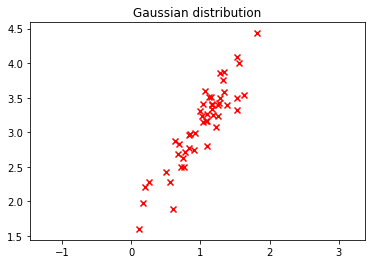

In [4]:
if testing:    
    plt.scatter(X[:,0],X[:,1], c='r', marker='x')
    plt.axis('equal')
    plt.title('Gaussian distribution')
    plt.show()

## Computing the matrix transformation

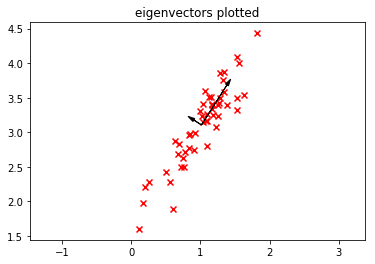

In [5]:
if testing:
    V,e,mu_X = ia.pca(X)
    sigma = np.sqrt(e) 
    
    # Plotando os dados e seus autovetores no sistema de coordenadas original
    arrowlist = [[mu_X[0], mu_X[1], sigma[0]*V[0,0], sigma[0]*V[1,0]],
                 [mu_X[0], mu_X[1], sigma[1]*V[0,1], sigma[1]*V[1,1]]]
              
    plt.scatter(X[:,0],X[:,1],
                     c = 'r',
                     marker = 'x')
    for arrow in arrowlist:
        plt.arrow(*arrow,head_width=0.05, head_length=0.1, fc='k', ec='k') 

    plt.axis('equal')
    plt.title('eigenvectors plotted')
    plt.show()
    

In [6]:
if testing:
    print('V:\n',V)
    print('e:\n',e)
    print('sigma:\n',sigma)
    print('mu_X\n',mu_X)
    
    Xr = (X - mu_X).dot(V)               # Transforming X
    
    Cr= np.cov(Xr,rowvar=False)         # Covariance matrix (NumPy)
    
    print('sigma**2', sigma**2)
    print('Cr:\n', Cr) 
    

V:
 [[ 0.53644073 -0.843938  ]
 [ 0.843938    0.53644073]]
e:
 [ 0.46925501  0.01733237]
sigma:
 [ 0.68502191  0.13165248]
mu_X
 [ 1.01542111  3.10580114]
sigma**2 [ 0.46925501  0.01733237]
Cr:
 [[  4.69255012e-01   1.88760226e-17]
 [  1.88760226e-17   1.73323749e-02]]


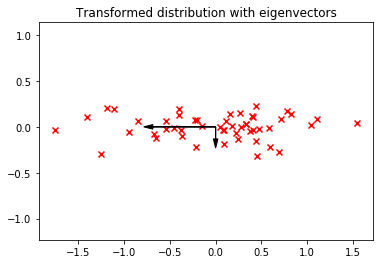

In [8]:
if testing:
    Vr, e_r, mu_Xr = ia.pca(Xr)
    sigma_r = np.sqrt(e_r) 
    
    # Plotando os dados e seus autovetores no sistema de coordenadas original
    arrowlist = [[mu_Xr[0], mu_Xr[1], sigma_r[0]*Vr[0,0], sigma_r[0]*Vr[1,0]],
                 [mu_Xr[0], mu_Xr[1], sigma_r[1]*Vr[0,1], sigma_r[1]*Vr[1,1]]]
              
    plt.scatter(Xr[:,0],Xr[:,1],
                     c = 'r',
                     marker = 'x')
    for arrow in arrowlist:
        plt.arrow(*arrow,head_width=0.05, head_length=0.1, fc='k', ec='k') 

    plt.axis('equal')
    plt.title('Transformed distribution with eigenvectors')
    plt.show()
    


## Method

1. Build matrix $X_{(n \times m)}$, where n (rows) gives the number of samples and m (columns) gives the number of attributes.
   m gives the dimensionality of the problem:

$$   X = \begin{bmatrix} X_{11} & \cdots & X_{1m} \\
   \vdots & \ddots & \vdots \\
   X_{n1} & \cdots & X_{nm} \\
   \end{bmatrix}
$$ 

2. Compute the mean values of every attributes of all samples:

$$   \overline{X} = \frac{1}{n} \begin{bmatrix}  \sum_{i = 1}^n X_{i1} &  \sum_{i = 1}^n X_{i2}  & \cdots & 
   \sum_{i = 1}^n X_{im} \end{bmatrix}
$$

3. Compute the covariance matrix:    

$$
   C = \frac{1}{n-1}(X - \overline{X})^T(X - \overline{X})
$$

4. Compute the eigenvalues ($e_i$) and the eigenvectors ($V_i$) which diagonalizes the covariance matrix ($\Sigma$):

$$
   \text{ Eigen values } = |C - eI|  = 0 \\
   \text{ Eigen vectors } = C V_i = e_i V_i
$$ 

5. The transformation matrix (V) of the PCA is built as following: the first column is the eigenvector related to the largest eigenvalue,
   the second column with the eigenvector related to the second largest eigenvalue and so.

The data transformation to the new coordinates system is given by:

$$   X_{new} = (X - \overline{X}) V $$

The eigenvalues $e_i$ give the variance of the data projected in the new coordinates system. 
To compute the variance percentage related to each eigenvector direction of the transformed coordinates system, 
divide the corresponding eigenvalue by the sum of all eigenvalues:

$$   Var\%(e_j) = \frac{e_j}{\sum_{i=1}^m e_i}  $$
 
    

## References

- [PCA - Wikipedia](http://en.wikipedia.org/wiki/Principal_component_analysis)
- [Karhunen-Loeve theorem](https://en.wikipedia.org/wiki/Karhunen%E2%80%93Lo%C3%A8ve_theorem)
- [Eigen decomposition of a matrix - Wikipedia](http://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)

## Contributions

- Roberto Medeiros de Souza, Sept 2013